# Parsing and analysing daily kingdoms

After having been sent a handy csv of the past TGG daily kingdoms, we can unpack them and put them into the yaml format we're used to.

In [2]:
import sys
sys.path.append("..")
import random_kingdominion as rk
import pandas as pd


In [6]:
xml_str = """<saveSets>
      <sets>
        <name>Butterfly madness</name>
        <strKingdom>-k pawn, pixie, ratcatcher, baron, magpie, town, village_green, catacombs, royal_carriage, fairgrounds, way_of_the_butterfly, scrounge -m NoColonies, NoShelters</strKingdom>
        <expansionsBitset>120132</expansionsBitset>
      </sets>
      <sets>
        <name>Finicky Sailage</name>
        <strKingdom>bridge_troll, groundskeeper, sailor, quartermaster, scavenger, witchs_hut, search, abundance, poacher, fairgrounds, arena, way_of_the_frog</strKingdom>
        <expansionsBitset>85450</expansionsBitset>
      </sets>
      <sets>
        <name>Prepare your tools</name>
        <strKingdom>royal_blacksmith, faithful_hound, herbalist, sleigh, secluded_shrine, research, tools, artificer, crypt, artisan, pious(artificer), prepare</strKingdom>
        <expansionsBitset>97298</expansionsBitset>
      </sets>
      <sets>
        <name>EZ Moat kingdom</name>
        <strKingdom>moat, forager, village, fortress, ironworks, mining_village, salvager, shepherd, bandit, rabble, way_of_the_frog, salt_the_earth</strKingdom>
        <expansionsBitset>22830</expansionsBitset>
      </sets>
      <sets>
        <name>The perfect Magnate kingdom?!</name>
        <strKingdom>astrolabe, sentinel, village, broker, cabin_boy, royal_galley, laboratory, magnate, pendant, swashbuckler, quest, fleet, league_of_shopkeepers</strKingdom>
        <expansionsBitset>107562</expansionsBitset>
      </sets>
      <sets>
        <name>Ugly Cardinality</name>
        <strKingdom>camel_train, enchantress, masquerade, cardinal, cutpurse, harbor_village, sailor, shepherd, duke, falconer, star_chart, way_of_the_goat</strKingdom>
        <expansionsBitset>96268</expansionsBitset>
      </sets>
      <sets>
        <name>One man's trash...</name>
        <strKingdom>haven, shaman, duplicate, necromancer, silk_merchant, young_witch(market_square), gatekeeper, junk_dealer, wheelwright, grand_market, shy(silk_merchant), wall</strKingdom>
        <expansionsBitset>97768</expansionsBitset>
      </sets>
      <sets>
        <name>Extra spinning without draw</name>
        <strKingdom>sycophant, stonemason, acting_troupe, remodel, rope, kiln, rogue, souk, trading_post, fairgrounds, island_folk, seize_the_day</strKingdom>
        <expansionsBitset>123846</expansionsBitset>
      </sets>
      <sets>
        <name>Odyssey for Victory</name>
        <strKingdom>native_village, shaman, odysseys, island, mill, remake, scavenger, smithy, harvest, mystic, patient(native_village), citadel</strKingdom>
        <expansionsBitset>106830</expansionsBitset>
      </sets>
      <sets>
        <name>Wishful Governance</name>
        <strKingdom>druid(the_forests_gift, the_moons_gift, the_rivers_gift), forager, secret_cave, village, baron, priest, sailor, festival, governor, rogue, training, quest</strKingdom>
        <expansionsBitset>13582</expansionsBitset>
      </sets>
      <sets>
        <name>No buy no problem</name>
        <strKingdom>supplies, apothecary, gondola, harbor_village, investment, journeyman, magnate, recruiter, sentry, altar, toil, colonies</strKingdom>
        <expansionsBitset>90930</expansionsBitset>
      </sets>
      <sets>
        <name>Druid racing</name>
        <strKingdom>druid(the_skys_gift, the_winds_gift, the_earths_gift), raze, camel_train, chariot_race, shanty_town, smugglers, remake, town, barge, tactician, avoid, windfall</strKingdom>
        <expansionsBitset>121932</expansionsBitset>
      </sets>
      <sets>
        <name>Looting Apprentice with a twist</name>
        <strKingdom>squire, shanty_town, dismantle, research, apprentice, crystal_ball, displace, guildmaster, wharf, sack_of_loot, toil, family_of_inventors</strKingdom>
        <expansionsBitset>123196</expansionsBitset>
      </sets>
      <sets>
        <name>Useful Feodum and insane Brokers</name>
        <strKingdom>cage, amulet, night_watchman, blockade, broker, cemetery, feodum, butcher, longship, wheelwright, alms, commerce, league_of_bankers</strKingdom>
        <expansionsBitset>120712</expansionsBitset>
      </sets>
      <sets>
        <name>Crazy Death Cartificer Horsey</name>
        <strKingdom>amulet, secret_cave, courier, death_cart, envoy, rats, artificer, enlarge, first_mate, villain, way_of_the_horse, triumphal_arch</strKingdom>
        <expansionsBitset>130304</expansionsBitset>
      </sets>
      <sets>
        <name>Quick single buy, multi gain</name>
        <strKingdom>cage, acting_troupe, experiment, sentinel, sheepdog, warehouse, envoy, baker, bazaar, artisan, delve, fawning(experiment)</strKingdom>
        <expansionsBitset>125450</expansionsBitset>
      </sets>
      <sets>
        <name>Double Tac beauty</name>
        <strKingdom>night_watchman, moneylender, barbarian, festival, royal_carriage, sentry, tactician, trading_post, witchs_hut, fairgrounds, seaway, way_of_the_butterfly</strKingdom>
        <expansionsBitset>54478</expansionsBitset>
      </sets>
      <sets>
        <name>Exo Miniature</name>
        <strKingdom>vineyard, fools_gold, moat, raze, snowy_village, bureaucrat, exorcist, feodum, catacombs, captain, bonfire, way_of_the_camel, shelters</strKingdom>
        <expansionsBitset>21906</expansionsBitset>
      </sets>
      <sets>
        <name>Wisp Hour</name>
        <strKingdom>vineyard, druid(the_earths_gift, the_moons_gift, the_swamps_gift), pawn, fortress, necromancer, weaver, bridge_troll, charlatan, sanctuary, skirmisher, inheritance, advance</strKingdom>
        <expansionsBitset>56756</expansionsBitset>
      </sets>
      <sets>
        <name>Patrolling Masters</name>
        <strKingdom>masquerade, taskmaster, gondola, weaver, journeyman, library, mine, patrol, spices, trickster, colonnade, way_of_the_horse</strKingdom>
        <expansionsBitset>92806</expansionsBitset>
      </sets>
      <sets>
        <name>Spicy Bridge Megaturn?</name>
        <strKingdom>pawn, forts, bridge, feodum, fortress, miser, temple, laboratory, sentry, fisherman, peril</strKingdom>
        <expansionsBitset>118022</expansionsBitset>
      </sets>
      <sets>
        <name>Steady Improvements 12t</name>
        <strKingdom>candlestick_maker, lurker, improve, dismantle, investment, walled_village, buried_treasure, cauldron, haunted_woods, hunter, journey, way_of_the_ox</strKingdom>
        <expansionsBitset>124580</expansionsBitset>
      </sets>
      <sets>
        <name>Crazy Priesting</name>
        <strKingdom>guardian, stonemason, fool, sentinel, harbor_village, priest, spice_merchant, figurine, groundskeeper, witch, way_of_the_chameleon, populate</strKingdom>
        <expansionsBitset>129666</expansionsBitset>
      </sets>
      <sets>
        <name>Golden Deck stuff</name>
        <strKingdom>city_quarter, apothecary, urchin, alchemist, bishop, caravan, feodum, bandit, captain, fairgrounds, bandit_fort, sewers</strKingdom>
        <expansionsBitset>10618</expansionsBitset>
      </sets>
      <sets>
        <name>What even are snowballs? Don't.</name>
        <strKingdom>druid(the_mountains_gift, the_forests_gift, the_winds_gift), odysseys, smugglers, steward, hostelry, ironworks, footpad, jester, joust, kings_cache, transport, nearby(druid(the_mountains_gift, the_forests_gift, the_winds_gift))</strKingdom>
        <expansionsBitset>119372</expansionsBitset>
      </sets>
      <sets>
        <name>Plentiful Orchard</name>
        <strKingdom>city_quarter, faithful_hound, lurker, squire, enchantress, port, sacrifice, margrave, sacred_grove, war_chest, alliance, orchard</strKingdom>
        <expansionsBitset>23972</expansionsBitset>
      </sets>
      <sets>
        <name>Prepare for Domination</name>
        <strKingdom>druid(the_skys_gift, the_swamps_gift, the_seas_gift), bishop, broker, jack_of_all_trades, remodel, cobbler, figurine, magnate, outpost, wayfarer, prepare, dominate, market_towns, colonies</strKingdom>
        <expansionsBitset>121002</expansionsBitset>
      </sets>
      <sets>
        <name>Neat Villa/Quarry stuff</name>
        <strKingdom>harbinger, wizards, hideout, nomads, quarry, villa, wandering_minstrel, charm, giant, seer, mountain_folk, museum, shelters</strKingdom>
        <expansionsBitset>44450</expansionsBitset>
      </sets>
      <sets>
        <name>Snowballville Captains</name>
        <strKingdom>catapult, oasis, cabin_boy, fortune_hunter, salvager, apprentice, library, paddock, swap, captain, canal, reckless(captain)</strKingdom>
        <expansionsBitset>125082</expansionsBitset>
      </sets>
      <sets>
        <name>On a crazy Mission</name>
        <strKingdom>supplies, university, experiment, warehouse, ironworks, bandit_camp, guildmaster, replace, wharf, artisan, ride, mission, coastal_haven</strKingdom>
        <expansionsBitset>58654</expansionsBitset>
      </sets>
      <sets>
        <name>Hoarding Villages</name>
        <strKingdom>snowy_village, wizards, duplicate, exorcist, ranger, village_green, emissary, scepter, scholar, hoard, desert_guides</strKingdom>
        <expansionsBitset>62496</expansionsBitset>
      </sets>
      <sets>
        <name>Fun Journey</name>
        <strKingdom>astrolabe, augurs, feodum, port, smithy, swamp_shacks, villa, collection, treasure_trove, wild_hunt, foray, journey, shelters</strKingdom>
        <expansionsBitset>101674</expansionsBitset>
      </sets>
      <sets>
        <name>Crazy Orchard</name>
        <strKingdom>ducat, lurker, pixie, raze, bounty_hunter, carpenter, fortress, forum, sentry, bank, quest, orchard</strKingdom>
        <expansionsBitset>64806</expansionsBitset>
      </sets>
      <sets>
        <name>Buy phase engine go brrr</name>
        <strKingdom>augurs, odysseys, tunnel, devils_workshop, festival, figurine, marchland, scepter, bank, kings_cache, ride</strKingdom>
        <expansionsBitset>127138</expansionsBitset>
      </sets>
      <sets>
        <name>Forge crazorski</name>
        <strKingdom>farmhands, forge, legionary, livery, plaza, quarry, scepter, seer, trickster, village, pursue, way_of_the_seal</strKingdom>
        <expansionsBitset>92770</expansionsBitset>
      </sets>
      <sets>
        <name>Grooming Madness</name>
        <strKingdom>gear, groom, hunting_party, jewelled_egg, legionary, port, royal_carriage, sentry, smithy, villa, guildhall</strKingdom>
        <expansionsBitset>93250</expansionsBitset>
      </sets>
      <sets>
        <name>Collecting Stockpiles</name>
        <strKingdom>animal_fair, barge, carnival, collection, hunting_lodge, landing_party, miser, moneylender, recruiter, stockpile, avoid, fair</strKingdom>
        <expansionsBitset>91234</expansionsBitset>
      </sets>
      <sets>
        <name>10 innocent turns...</name>
        <strKingdom>farrier, dungeon, taskmaster, maroon, throne_room, bandit, ferryman(tools), horn_of_plenty, journeyman, laboratory, banish</strKingdom>
        <expansionsBitset>83522</expansionsBitset>
      </sets>
      <sets>
        <name>Power Card Galore</name>
        <strKingdom>shaman, exorcist, ironmonger, marauder, village_green, charm, livery, seer, wharf, forge, defiled_shrine, triumph, shelters</strKingdom>
        <expansionsBitset>96552</expansionsBitset>
      </sets>
      <sets>
        <name>Denning the Livery</name>
        <strKingdom>cage, steward, stowaway, cutpurse, poacher, swamp_shacks, artificer, catacombs, livery, silver_mine, wolf_den</strKingdom>
        <expansionsBitset>85262</expansionsBitset>
      </sets>
      <sets>
        <name>Interesting BridgeTroll Sickness</name>
        <strKingdom>crossroads, page, squire, watchtower, farmhands, poet, bridge_troll, idol, souk, prince, sickness, fountain</strKingdom>
        <expansionsBitset>138720</expansionsBitset>
      </sets>
      <sets>
        <name>Neat Aristocrats</name>
        <strKingdom>artist, fishmonger, aristocrat, craftsman, snowy_village, ninja, falconer, hunting_lodge, ronin, wayfarer</strKingdom>
        <expansionsBitset>147456</expansionsBitset>
      </sets>
    </saveSets>
"""
import xml.etree.ElementTree as ET


# Parse the XML string
root = ET.fromstring(xml_str)

# Initialize an empty list to store the sets
sets_list = []

# Iterate over all <sets> elements
for set_elem in root.findall('sets'):
    # Extract the name and strKingdom
    name = set_elem.find('name').text
    str_kingdom = set_elem.find('strKingdom').text
    
    # Append to the list as a dictionary
    sets_list.append({'name': name, 'strKingdom': str_kingdom})

own_manager = rk.KingdomManager()
own_manager.load_custom_kingdoms()
for set_dict in sets_list:
    name = set_dict['name']
    if name in [k["name"] for k in own_manager.kingdoms]:
        continue
    kingdom_str = set_dict['strKingdom'].replace("-m", ", ").replace("-k" , ", ")
    try:
        k = rk.Kingdom.from_dombot_csv_string(kingdom_str, name=set_dict['name'])
    except ValueError as e:
        print(e)
        print(kingdom_str)
        continue
    if not k.is_valid:
        print(k)
        print(k.get_reasons_for_invalidity())
        print(kingdom_str)
    if k.notes != "":
        print(k.name)
        print(k.notes)
        k.notes = ""
    own_manager.add_kingdom(k, try_save=False)

own_manager.save_kingdoms_to_yaml(rk.FPATH_KINGDOMS_CUSTOM)


Butterfly madness
Unrecognized: ['']

What even are snowballs? Don't.
Removed nested parentheses.



In [22]:
rk.Kingdom.from_dombot_csv_string("engineer, sleigh, castles, sage, sheepdog, encampment, relic, sailor, highway, mint, avoid, knights, way_of_the_horse")


Kingdom(cards=['castles', 'encampment/plunder', 'engineer', 'highway', 'knights', 'mint', 'relic', 'sage', 'sailor', 'sheepdog', 'sleigh'], landscapes=['avoid', 'way_of_the_horse'], expansions=['Adventures', 'Dark Ages', 'Empires', 'Hinterlands, 2E', 'Menagerie', 'Plunder', 'Prosperity, 2E', 'Seaside, 2E'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', ferryman_pile='', riverboat_card='', mouse_card='', army_pile='', druid_boons=[], traits=[], name='', notes='', idx=149766069804029050069517538603808515296, total_qualities={'village': np.int64(2), 'draw': np.int64(3), 'thinning': np.int64(3), 'gain': np.int64(2), 'attack': np.int64(3), 'altvp': np.int64(3), 'interactivity': np.int64(4)})

In [9]:
# Load existing manager and update with all dailies that are not already in the manager
manager = rk.KingdomManager()
manager.load_tgg_dailies()
for kingdom in manager.kingdoms:
    if "/" in kingdom["name"]:
        year = kingdom["name"][-2:]
        kingdom["name"] = f"20{year}-" + kingdom["name"].replace("/", "-")[:-3]
with open(rk.PATH_ASSETS.joinpath("kingdoms/daily_dombot_strings.txt"), "r") as f:
    dombot_strings = f.read().split("\n")[::-1]
for line in dombot_strings:
    if line == "":
        continue
    name = line.split(":")[0]
    if name in [k["name"] for k in manager.kingdoms] or line.split(":")[1].strip() == "":
        continue
    dombot_string = " ".join(line.split()[1:])
    kingdom = rk.Kingdom.from_dombot_csv_string(dombot_string)
    kingdom.name = name
    assert kingdom.is_valid
    manager.kingdoms.insert(0, kingdom.get_dict_repr())

manager.save_kingdoms_to_yaml(rk.FPATH_KINGDOMS_TGG_DAILIES)


In [8]:
for kingdom_dict in manager.kingdoms:
    k = rk.Kingdom.from_dict(kingdom_dict)
    if len(reasons := k.get_reasons_for_invalidity()) > 0:
        print(k.name)
        print(reasons)


2024-3-23
['no_druid_boons']


## Some old stuff:

In [ ]:

# kingdoms = pd.read_csv(rk.PATH_ASSETS.joinpath("kingdoms/daily_dominion_tgg.csv"))

def parse_kingdom(kingdom_row: pd.Series) -> rk.Kingdom:
    cards = [kingdom_row[f"Card {i}"] for i in range(1, 11)]
    landscapes = [entry for i in range(1, 5) if not pd.isna(entry := kingdom_row[f"Landscape/Extra {i}"])]
    notes = "" if pd.isna(entry := kingdom_row["Notes"]) else entry
    return rk.Kingdom(cards=cards, landscapes=landscapes, notes=notes, name=kingdom_row["Date"])

# kingdoms.iloc[0]
# parse_kingdom(kingdoms.iloc[0])

# manager = rk.KingdomManager()
# for _, row in kingdoms.iterrows():
#     try:
#         kingdom = parse_kingdom(row)
#         manager.add_kingdom(kingdom, try_save=False)
#     except KeyError as e:
#         print(e)


In [11]:
# manager.save_kingdoms_to_yaml(rk.PATH_ASSETS.joinpath("kingdoms/dailies_prelim.yml"))
# ! There are a few bugs with Seaway and Borrow ending up as cards


In [2]:
manager = rk.KingdomManager()
manager.load_kingdoms_from_yaml(rk.PATH_ASSETS.joinpath("kingdoms/dailies_prelim.yml"))


In [45]:
from datetime import datetime
import numpy as np

for kingdom in manager.kingdoms:
    kingdom.date = datetime.strptime(kingdom.name, "%m/%d/%y")
last_six_month_kingdoms = [k for k in manager.kingdoms if k.date > datetime.now() - pd.DateOffset(months=6)]
# last_six_month_kingdoms = manager.kingdoms
combined_cards = pd.concat([k.kingdom_card_df for k in last_six_month_kingdoms])


In [46]:
combined_cards[combined_cards["Expansion"] == "Plunder"]["Name"].value_counts()
# rk.ALL_CSOS[~np.in1d(rk.ALL_CSOS["Name"], combined_cards["Name"]) & (~rk.ALL_CSOS["Expansion"].str.contains("1E")) & rk.ALL_CSOS["IsInSupply"] & (rk.ALL_CSOS["Expansion"] != "Promo")][["Name", "Expansion"]]


Name
Rope               7
Shaman             6
Figurine           5
Landing Party      5
Crucible           4
Flagship           4
Pickaxe            4
Siren              4
King's Cache       4
Mapmaker           4
Grotto             4
Crew               3
Mining Road        3
Pendant            3
Search             3
Secluded Shrine    3
Taskmaster         3
Jewelled Egg       3
Fortune Hunter     3
Cage               3
Wealthy Village    2
Swamp Shacks       2
Pilgrim            2
Gondola            2
Harbor Village     2
Abundance          2
Maroon             2
Sack of Loot       2
Longship           2
Tools              2
Buried Treasure    2
Quartermaster      1
Cutthroat          1
Frigate            1
Enlarge            1
Cabin Boy          1
Trickster          1
Silver Mine        1
Name: count, dtype: int64

### Analyse these kingdoms

'Base'

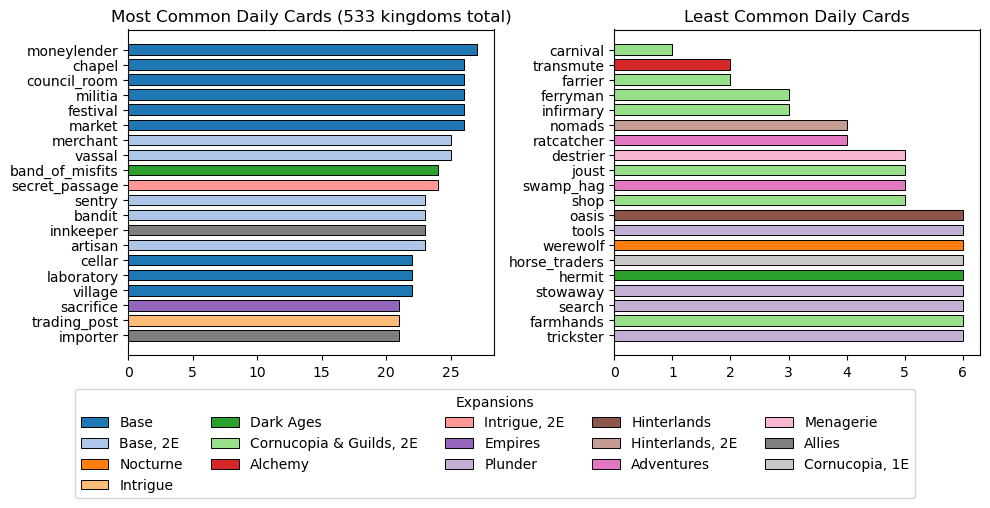

In [3]:
all_cards = [card for k in manager.kingdoms for card in k.cards]
all_landscapes = [card for k in manager.kingdoms for card in k.landscapes]

def count_values(vals: list[str | str]) -> dict[str, int]:
    return {val: vals.count(val) for val in set(vals)}

def sort_counts(counts: dict[str, int]) -> list[tuple[str, int]]:
    return sorted(counts.items(), key=lambda x: x[1])


# Plot the 10 most common cards, and the 10 least common cards:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

amount = 20
card_counts = sort_counts(count_values(all_cards))
most_common_cards = card_counts[-amount:]
least_common_cards = list(reversed(card_counts[:amount]))
rk.EXPANSION_LIST
def get_expansion(card: str) -> str:
    return rk.ALL_CSOS.loc[card]["Expansion"]

hbar_kwargs = dict(height=0.7, align='center', ec="k", linewidth=0.7)

# Collect all unique expansions from the most and least common cards
unique_expansions = set([get_expansion(card) for card, _ in most_common_cards + least_common_cards])
# Assign colors for expansions from a matplotlib colormap:
expansion_colors = {expansion: plt.cm.tab20(i) for i, expansion in enumerate(unique_expansions)}


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
most_common_colors = [expansion_colors[get_expansion(card)] for card, _ in most_common_cards]
ax[0].barh([card for card, _ in most_common_cards], [count for _, count in most_common_cards], color=most_common_colors, **hbar_kwargs)
ax[0].set_title(f"Most Common Daily Cards ({len(manager)} kingdoms total)")


# For least common cards
least_common_colors = [expansion_colors[get_expansion(card)] for card, _ in least_common_cards]
ax[1].barh([card for card, _ in least_common_cards], [count for _, count in least_common_cards], color=least_common_colors, **hbar_kwargs)
ax[1].set_title("Least Common Daily Cards")
plt.tight_layout()

# Create a list of legend handles (patches) for each unique expansion
legend_handles = [Patch(color=expansion_colors[expansion], label=expansion, ec="k", lw=0.7) for expansion in unique_expansions]

# Add the legend to your plot
# You can choose to add it to one of the subplots (e.g., ax[0] or ax[1]) or to the figure itself using fig.legend
# Here's how to add it to the figure, with a location of your choice
fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.03), ncol=5, title="Expansions")
get_expansion("moneylender")
# [card for card in rk.ALL_CSOS[rk.ALL_CSOS["IsInSupply"] & ~rk.ALL_CSOS["Expansion"].str.contains("1E") & ~rk.ALL_CSOS["Expansion"].str.contains("Promo")].index if not card in all_cards]


136

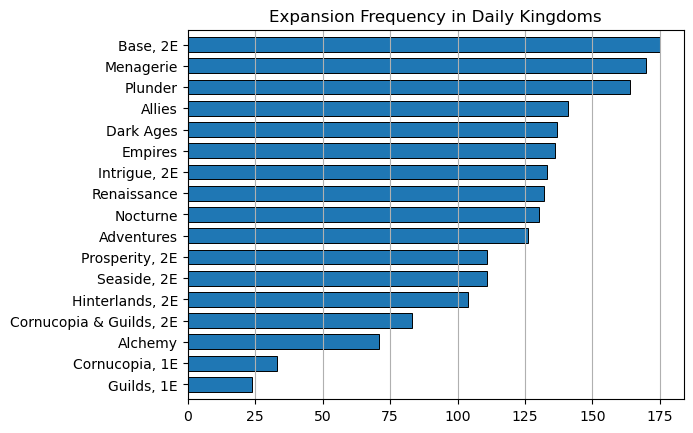

In [37]:
# Plot a histogram of the expansions used:
all_expansions = [exp for k in manager.kingdoms for exp in k.expansions]

expansion_counts = sort_counts(count_values(all_expansions))

fig, ax = plt.subplots()

ax.barh([expansion for expansion, _ in expansion_counts], [count for _, count in expansion_counts], **hbar_kwargs)
ax.grid(axis='x')
ax.set_title("Expansion Frequency in Daily Kingdoms")
ax.set_ylim(-0.7, len(expansion_counts)-0.3)

count_values(all_cards)["possession"]
len(rk.ALL_CSOS[rk.ALL_CSOS["Expansion"].str.contains("Alchemy") & rk.ALL_CSOS["IsInSupply"]])
len([card for card in all_cards if rk.ALL_CSOS.loc[card]["Expansion"] == "Alchemy"])


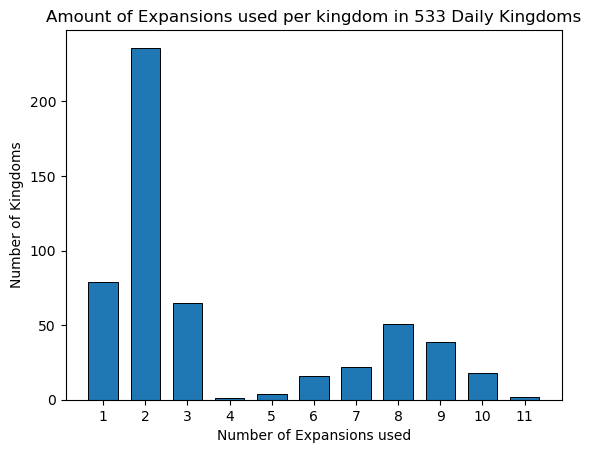

In [10]:
expansion_amounts = count_values([len(k.expansions) for k in manager.kingdoms])

fig, ax = plt.subplots()
bar_kwargs = hbar_kwargs.copy()
bar_kwargs.pop("height")
bar_kwargs["width"] = 0.7
ax.bar(expansion_amounts.keys(), expansion_amounts.values(), **bar_kwargs)
ax.set_xlabel("Number of Expansions used")
ax.set_ylabel("Number of Kingdoms")
ax.set_title(f"Amount of Expansions used per kingdom in {len(manager)} Daily Kingdoms")
ax.xaxis.set_major_locator(plt.MultipleLocator(1))


Text(0, 0.5, 'Frequency')

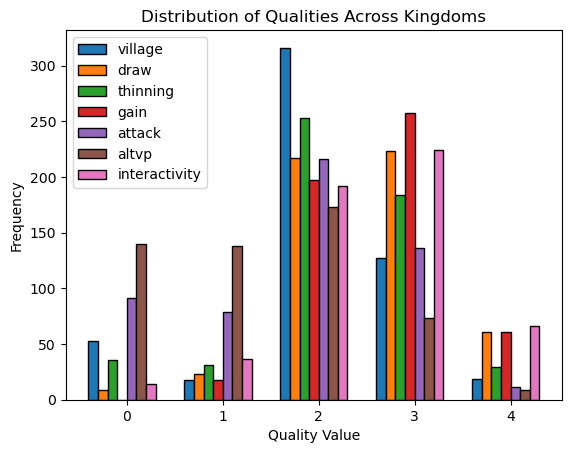

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rk.QUALITIES_AVAILABLE is a list of qualities you want to plot
qualities = rk.QUALITIES_AVAILABLE.copy()


x = np.arange(6)  # Qualities can be in the range [0, 5]

# The frequencies of how often each quality appears in the data
y_data = {}
for qual in qualities:
    occurrences = [k.total_qualities[qual] for k in manager.kingdoms]
    y_data[qual] =np.histogram(occurrences, bins=x)[0]



bar_width = 0.1  # Adjust as needed to fit your data

# Plotting
fig, ax = plt.subplots()
for i, qual in enumerate(qualities):
    # Adjust x positions for each quality
    adjusted_x_positions = x[:-1] + (i * bar_width)-len(qualities)*bar_width/2
    ax.bar(adjusted_x_positions, y_data[qual], width=bar_width, label=qualities[i], ec="k")


# Add legend to distinguish different qualities
plt.legend()

# Add titles and labels as necessary
plt.title('Distribution of Qualities Across Kingdoms')
plt.xlabel('Quality Value')
plt.ylabel('Frequency')



In [38]:

moneyish = [k for k in manager.kingdoms if k.total_qualities["draw"] < 2 or k.total_qualities["village"] < 2 or k.total_qualities["gain"] < 2]

moneyish[:5]


[Kingdom(cards=['apothecary', 'apprentice', 'fools_gold', 'guard_dog', 'margrave', 'philosophers_stone', 'souk', 'stables', 'trader', 'wheelwright'], landscapes=[], expansions=['Alchemy', 'Hinterlands, 2E'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', ferryman_pile='', mouse_card='', druid_boons=[], traits=[], name='7/17/24', notes='', idx=337713683047333424977554180227145447104, total_qualities={'village': 0, 'draw': 4, 'thinning': 2, 'gain': 3, 'attack': 2, 'altvp': 0, 'interactivity': 2}),
 Kingdom(cards=['cartographer', 'collection', 'crucible', 'fairgrounds', 'improve', 'mine', 'oasis', 'procession', 'sailor', 'wishing_well'], landscapes=['guildhall', 'wedding'], expansions=['Base, 2E', 'Cornucopia & Guilds, 2E', 'Dark Ages', 'Empires', 'Hinterlands, 2E', 'Intrigue, 2E', 'Plunder', 'Prosperity, 2E', 'Renaissance', 'Seaside, 2E'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', ferryman_pile='', mouse_card='', 

In [42]:
engine_ish = [k for k in manager.kingdoms if all([k.total_qualities[qual] > 1 for qual in ["draw", "village", "gain", "thinning"]])]
len(engine_ish)/len(manager)


0.6716697936210131

In [43]:
[str(k.date.date()) for k in manager.kingdoms if len(k.expansions) == 11]


['2024-02-24', '2023-05-20']